In [24]:
pip install praw

   ---------------------------------------- 0.0/191.0 kB ? eta -:--:--
   -- ------------------------------------- 10.2/191.0 kB ? eta -:--:--
   -------- ------------------------------ 41.0/191.0 kB 487.6 kB/s eta 0:00:01
   -------------------------------------- - 184.3/191.0 kB 1.4 MB/s eta 0:00:01
   ---------------------------------------- 191.0/191.0 kB 1.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [18]:
import praw
import pandas as pd

# Set up Reddit API credentials
reddit = praw.Reddit(
    client_id="qwD9HsgIFNFkftWCyBsr2A",
    client_secret="WYtGcKHVT9t4s75d3452v4svTGTA-A",
    user_agent="BrandSentimentApp v1.0 by Tight_Air7896"
)

# Define the subreddit and keyword for tracking sentiment
subreddit = reddit.subreddit("TeslaMotors")  # You can change the subreddit if needed
keyword = "Tesla"  # Define your brand name or keyword

# Function to collect Reddit posts and their top-level comments
def collect_reddit_posts_with_comments(subreddit, keyword, limit=500, comment_limit=5):
    posts = []
    # Search for posts with the keyword in the specified subreddit
    for submission in subreddit.search(keyword, limit=limit):
        # Collect post details
        post_data = {
            'title': submission.title,
            'score': submission.score,
            'url': submission.url,
            'num_comments': submission.num_comments,
            'created_utc': submission.created_utc,
            'selftext': submission.selftext,
            'comments': []
        }
        
        # Fetch top-level comments (up to comment_limit)
        submission.comments.replace_more(limit=0)  # Ensure all comments are loaded
        for comment in submission.comments[:comment_limit]:
            post_data['comments'].append(comment.body)
        
        posts.append(post_data)
    return posts

# Collect posts with comments
posts_data = collect_reddit_posts_with_comments(subreddit, keyword, limit=500, comment_limit=5)

# Convert the data into a DataFrame for easier analysis
df = pd.DataFrame(posts_data)

# Display the first few rows of the DataFrame
print(df.head())

# Optionally, save the DataFrame to a CSV file for further analysis
df.to_csv('reddit_posts_tesla_with_comments_two.csv', index=False)

                                               title  score  \
0  The average price of used Tesla continues to d...   1016   
1  Tesla CEO Elon Musk could leave if $56 billion...  12112   
2  Tesla billionaire investor votes against resto...  18275   
3  Elon Musk confirms his threat: give me 25% of ...   9187   
4  Tesla shareholders should reject Elon Musk’s U...   5475   

                                                 url  num_comments  \
0               https://i.redd.it/to1fiiyibcqc1.jpeg           626   
1  https://www.theverge.com/2024/6/6/24173064/tes...          2560   
2  https://www.forbes.com.au/news/innovation/tesl...          1115   
3  https://electrek.co/2024/05/20/elon-musk-confi...          2025   
4  https://financialpost.com/commodities/energy/e...          1048   

    created_utc selftext                                           comments  
0  1.711311e+09           [This chart combined with the fact that data i...  
1  1.717703e+09           [[First and foremo

In [79]:
print(df[['cleaned_selftext', 'cleaned_title', 'cleaned_comments']].head())


  cleaned_selftext                                      cleaned_title  \
0       no content  the average price of used tesla continues to d...   
1       no content  tesla ceo elon musk could leave if 56 billion ...   
2       no content  tesla billionaire investor votes against resto...   
3       no content  elon musk confirms his threat give me 25 of te...   
4       no content  tesla shareholders should reject elon musks us...   

                                    cleaned_comments  
0  [, , t, h, i, s, , c, h, a, r, t, , c, o, m, b...  
1  [, , , f, i, r, s, t, , a, n, d, , f, o, r, e,...  
2  [, , , f, i, r, s, t, , a, n, d, , f, o, r, e,...  
3  [, , , f, i, r, s, t, , a, n, d, , f, o, r, e,...  
4  [, , , f, i, r, s, t, , a, n, d, , f, o, r, e,...  


In [85]:
import pandas as pd
import re

# Load the dataset (adjust the file path as needed)
df = pd.read_csv('reddit_posts_tesla_with_comments_two.csv')  # Replace with your actual data file

# Step 1: Fill missing or empty 'selftext' with a placeholder
df['cleaned_selftext'] = df['selftext'].apply(lambda x: 'No content' if pd.isnull(x) or str(x).strip() == '' else x)

# Step 2: Fill missing or empty 'title' with a placeholder
df['cleaned_title'] = df['title'].apply(lambda x: 'No title' if pd.isnull(x) or str(x).strip() == '' else x)

# Step 3: Function to handle missing or empty comments
def fill_missing_comments(comments):
    if not comments:  # Check if the list is empty
        return ['No comments']  # Replace with a placeholder
    return comments  # Return the original list if not empty

# Step 4: Apply the function to the 'comments' column
df['cleaned_comments'] = df['comments'].apply(fill_missing_comments)

# Step 5: Clean the text in 'cleaned_selftext', 'cleaned_title', and 'cleaned_comments'
def clean_text(text):
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)  # Remove URLs
    text = re.sub(r'\s+', ' ', re.sub(r'[^A-Za-z0-9 ]+', '', text))  # Remove special characters and extra spaces
    return text.strip()

# Apply cleaning function to 'cleaned_selftext' and 'cleaned_title'
df['cleaned_selftext'] = df['cleaned_selftext'].apply(clean_text)
df['cleaned_title'] = df['cleaned_title'].apply(clean_text)

# Clean the list of comments
df['cleaned_comments'] = df['cleaned_comments'].apply(lambda x: [clean_text(c) for c in x])

# Step 6: Convert to lowercase for consistency
df['cleaned_selftext'] = df['cleaned_selftext'].str.lower()
df['cleaned_title'] = df['cleaned_title'].str.lower()
df['cleaned_comments'] = df['cleaned_comments'].apply(lambda x: [c.lower() for c in x])

# Step 7: Check the shape of the DataFrame to ensure no rows are dropped
print(df.shape)

# Preview the cleaned data
print(df[['cleaned_selftext', 'cleaned_title', 'cleaned_comments']].head())

# Step 8: Save the cleaned data to a new CSV file
df.to_csv('cleaned_reddit_posts_with_comments.csv', index=False)


(236, 10)
  cleaned_selftext                                      cleaned_title  \
0       no content  the average price of used tesla continues to d...   
1       no content  tesla ceo elon musk could leave if 56 billion ...   
2       no content  tesla billionaire investor votes against resto...   
3       no content  elon musk confirms his threat give me 25 of te...   
4       no content  tesla shareholders should reject elon musks us...   

                                    cleaned_comments  
0  [, , t, h, i, s, , c, h, a, r, t, , c, o, m, b...  
1  [, , , f, i, r, s, t, , a, n, d, , f, o, r, e,...  
2  [, , , f, i, r, s, t, , a, n, d, , f, o, r, e,...  
3  [, , , f, i, r, s, t, , a, n, d, , f, o, r, e,...  
4  [, , , f, i, r, s, t, , a, n, d, , f, o, r, e,...  


In [89]:
import pandas as pd
import re

# Load the dataset (adjust the file path as needed)
df = pd.read_csv('reddit_posts_tesla_with_comments_two.csv')  # Replace with your actual data file

# Step 1: Fill missing or empty 'selftext' with a placeholder
df['cleaned_selftext'] = df['selftext'].apply(lambda x: 'No content' if pd.isnull(x) or str(x).strip() == '' else x)

# Step 2: Fill missing or empty 'title' with a placeholder
df['cleaned_title'] = df['title'].apply(lambda x: 'No title' if pd.isnull(x) or str(x).strip() == '' else x)

# Step 3: Function to handle missing or empty comments
def fill_missing_comments(comments):
    if isinstance(comments, str):
        return [comments] if comments.strip() else ['No comments']  # If string is empty, replace with a placeholder
    elif isinstance(comments, list) and len(comments) > 0:
        return comments  # Return the original list if not empty
    else:
        return ['No comments']  # Default case for other formats

# Step 4: Apply the function to the 'comments' column
df['cleaned_comments'] = df['comments'].apply(fill_missing_comments)

# Step 5: Clean the text in 'cleaned_selftext', 'cleaned_title', and 'cleaned_comments'
def clean_text(text):
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)  # Remove URLs
    text = re.sub(r'\s+', ' ', re.sub(r'[^A-Za-z0-9 ]+', '', text))  # Remove special characters and extra spaces
    return text.strip()

# Apply cleaning function to 'cleaned_selftext' and 'cleaned_title'
df['cleaned_selftext'] = df['cleaned_selftext'].apply(clean_text)
df['cleaned_title'] = df['cleaned_title'].apply(clean_text)

# Clean the list of comments, ensuring each comment is a string
df['cleaned_comments'] = df['cleaned_comments'].apply(lambda x: [clean_text(c) for c in x if isinstance(c, str)])

# Step 6: Convert to lowercase for consistency
df['cleaned_selftext'] = df['cleaned_selftext'].str.lower()
df['cleaned_title'] = df['cleaned_title'].str.lower()
df['cleaned_comments'] = df['cleaned_comments'].apply(lambda x: [c.lower() for c in x])

# Step 7: Check the shape of the DataFrame to ensure no rows are dropped
print(df.shape)

# Preview the cleaned data
print(df[['cleaned_selftext', 'cleaned_title', 'cleaned_comments']].head())

# Step 8: Save the cleaned data to a new CSV file
df.to_csv('cleaned_reddit_posts_with_comments5.csv', index=False)


(236, 10)
  cleaned_selftext                                      cleaned_title  \
0       no content  the average price of used tesla continues to d...   
1       no content  tesla ceo elon musk could leave if 56 billion ...   
2       no content  tesla billionaire investor votes against resto...   
3       no content  elon musk confirms his threat give me 25 of te...   
4       no content  tesla shareholders should reject elon musks us...   

                                    cleaned_comments  
0  [this chart combined with the fact that data i...  
1  [first and foremost please read rteslamotors a...  
2  [first and foremost please read rteslamotors a...  
3  [first and foremost please read rteslamotors a...  
4  [first and foremost please read rteslamotors a...  


In [91]:
pip install vaderSentiment



   ---------------------------------------- 0.0/126.0 kB ? eta -:--:--
   --- ------------------------------------ 10.2/126.0 kB ? eta -:--:--
   ------------ -------------------------- 41.0/126.0 kB 487.6 kB/s eta 0:00:01
   ---------------------------------------- 126.0/126.0 kB 1.1 MB/s eta 0:00:00


In [93]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to analyze sentiment
def analyze_sentiment(text):
    score = analyzer.polarity_scores(text)
    return score['compound']  # Return the compound score

# Apply sentiment analysis to cleaned selftext and comments
df['selftext_sentiment'] = df['cleaned_selftext'].apply(analyze_sentiment)
df['title_sentiment'] = df['cleaned_title'].apply(analyze_sentiment)
df['comments_sentiment'] = df['cleaned_comments'].apply(lambda x: [analyze_sentiment(c) for c in x])

In [97]:
print(df[['cleaned_selftext', 'selftext_sentiment', 'cleaned_title', 'title_sentiment', 'cleaned_comments', 'comments_sentiment']].head())
df.to_csv('sentiment_analysis.csv', index=False)


  cleaned_selftext  selftext_sentiment  \
0       no content              -0.296   
1       no content              -0.296   
2       no content              -0.296   
3       no content              -0.296   
4       no content              -0.296   

                                       cleaned_title  title_sentiment  \
0  the average price of used tesla continues to d...           0.2263   
1  tesla ceo elon musk could leave if 56 billion ...          -0.2773   
2  tesla billionaire investor votes against resto...           0.2023   
3  elon musk confirms his threat give me 25 of te...          -0.5267   
4  tesla shareholders should reject elon musks us...          -0.4767   

                                    cleaned_comments comments_sentiment  
0  [this chart combined with the fact that data i...           [0.9829]  
1  [first and foremost please read rteslamotors a...           [0.8237]  
2  [first and foremost please read rteslamotors a...           [0.4664]  
3  [first an

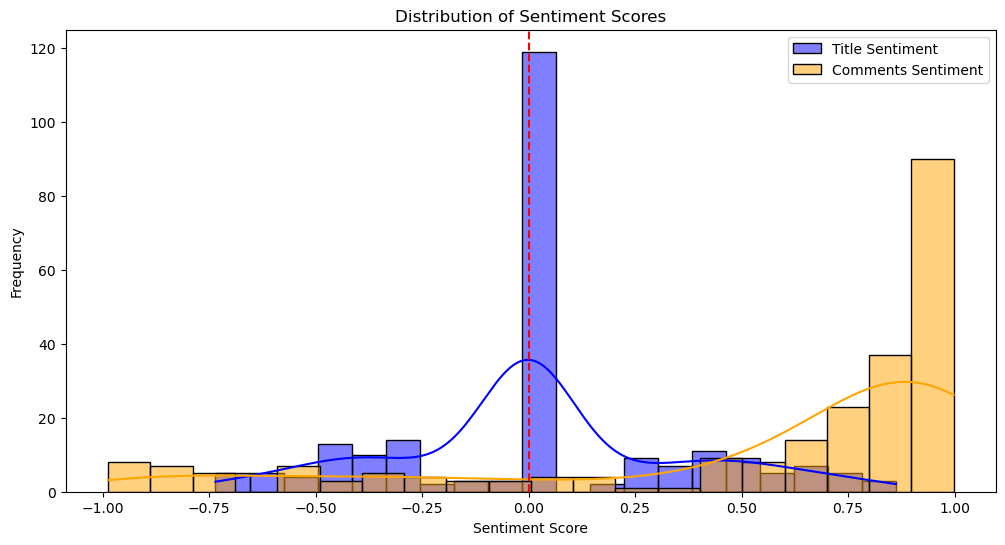

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.histplot(df['title_sentiment'], bins=20, kde=True, color='blue', label='Title Sentiment')
sns.histplot([score for sublist in df['comments_sentiment'] for score in sublist], bins=20, kde=True, color='orange', label='Comments Sentiment')
plt.axvline(0, color='red', linestyle='--')
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [134]:
def categorize_sentiment(score):
    if score > 0.05:
        return 'Positive'
    elif score < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['title_sentiment_category'] = df['title_sentiment'].apply(categorize_sentiment)
df['comments_sentiment_category'] = df['comments_sentiment'].apply(lambda x: categorize_sentiment(x[0]))  # Assuming the first comment's score
df.to_csv('sentiment_analysis_next.csv', index=False)

In [103]:
title_summary = df['title_sentiment_category'].value_counts()
comments_summary = df['comments_sentiment_category'].value_counts()

print("Title Sentiment Summary:")
print(title_summary)

print("\nComments Sentiment Summary:")
print(comments_summary)

Title Sentiment Summary:
title_sentiment_category
Neutral     121
Positive     59
Negative     56
Name: count, dtype: int64

Comments Sentiment Summary:
comments_sentiment_category
Positive    189
Negative     45
Neutral       2
Name: count, dtype: int64


In [106]:
# Extract the first sentiment score from each list in comments_sentiment
flattened_comments_sentiment = [score[0] for score in df['comments_sentiment']]

# Calculate the correlation
correlation = df['title_sentiment'].corr(pd.Series(flattened_comments_sentiment))
print(f'Correlation between Title Sentiment and Comments Sentiment: {correlation}')


Correlation between Title Sentiment and Comments Sentiment: 0.09237199536773515


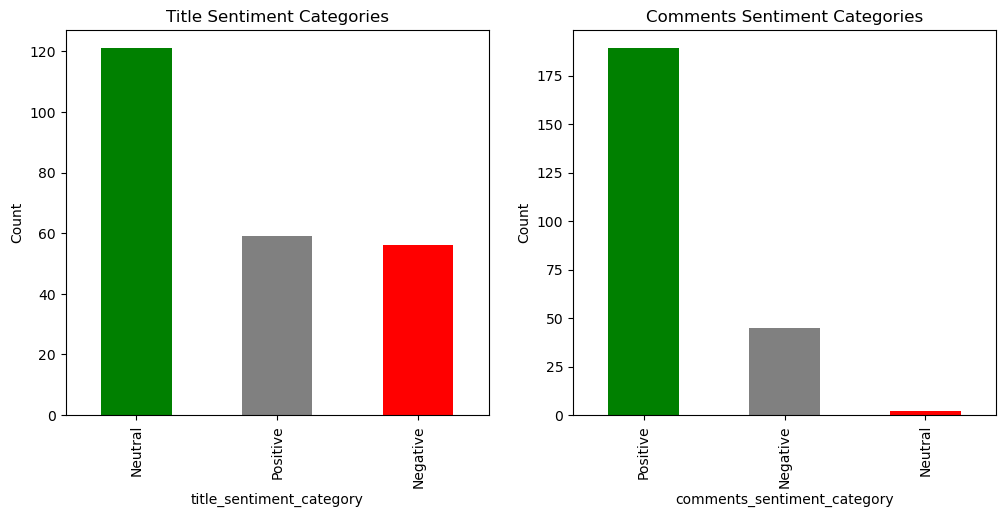

In [108]:
title_counts = df['title_sentiment_category'].value_counts()
comments_counts = df['comments_sentiment_category'].value_counts()

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
title_counts.plot(kind='bar', color=['green', 'gray', 'red'])
plt.title('Title Sentiment Categories')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
comments_counts.plot(kind='bar', color=['green', 'gray', 'red'])
plt.title('Comments Sentiment Categories')
plt.ylabel('Count')

plt.show()

In [110]:
pip install pandas matplotlib seaborn wordcloud



   ---------------------------------------- 0.0/301.4 kB ? eta -:--:--
   - -------------------------------------- 10.2/301.4 kB ? eta -:--:--
   --- ----------------------------------- 30.7/301.4 kB 435.7 kB/s eta 0:00:01
   ----------------------- ---------------- 174.1/301.4 kB 1.5 MB/s eta 0:00:01
   ---------------------------------------- 301.4/301.4 kB 2.1 MB/s eta 0:00:00


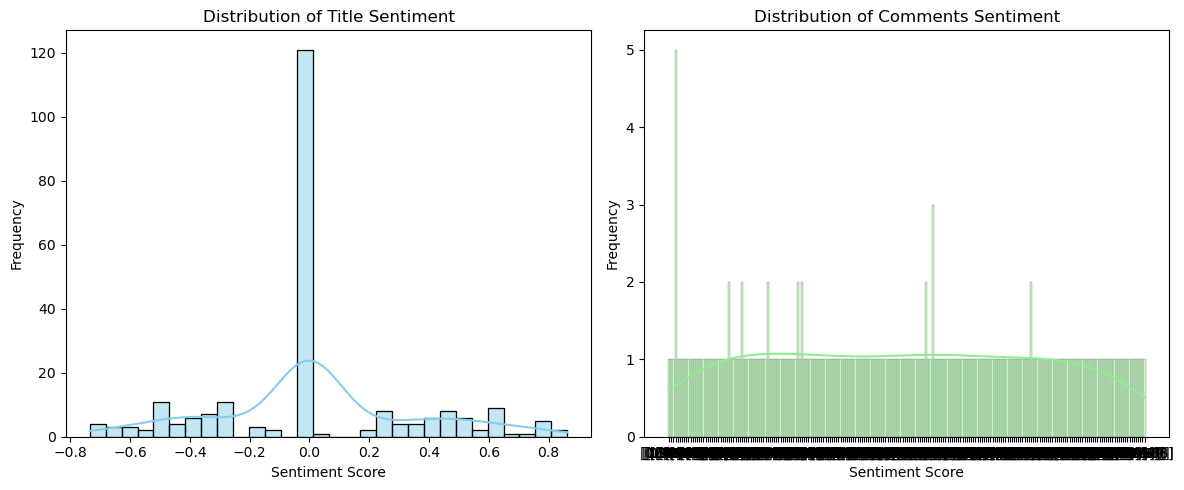

In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

data = pd.read_csv('sentiment_analysis.csv')

# Set up the figure
plt.figure(figsize=(12, 5))

# Histogram for title_sentiment
plt.subplot(1, 2, 1)
sns.histplot(data['title_sentiment'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Title Sentiment')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')

# Histogram for comments_sentiment
plt.subplot(1, 2, 2)
sns.histplot(data['comments_sentiment'], bins=30, kde=True, color='lightgreen')
plt.title('Distribution of Comments Sentiment')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()



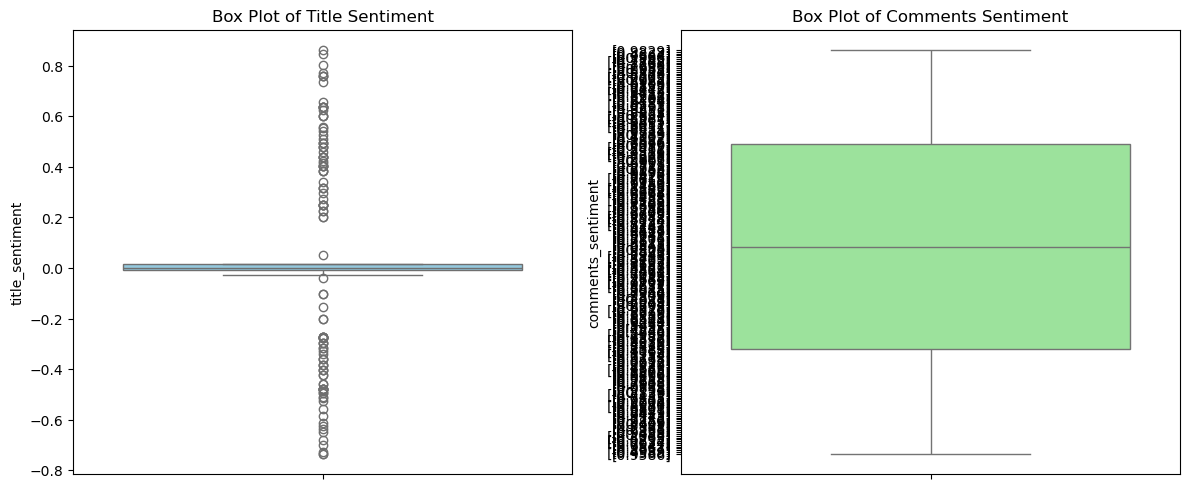

In [114]:
plt.figure(figsize=(12, 5))

# Box plot for title_sentiment
plt.subplot(1, 2, 1)
sns.boxplot(data=data, y='title_sentiment', color='skyblue')
plt.title('Box Plot of Title Sentiment')

# Box plot for comments_sentiment
plt.subplot(1, 2, 2)
sns.boxplot(data=data, y='comments_sentiment', color='lightgreen')
plt.title('Box Plot of Comments Sentiment')

plt.tight_layout()
plt.show()


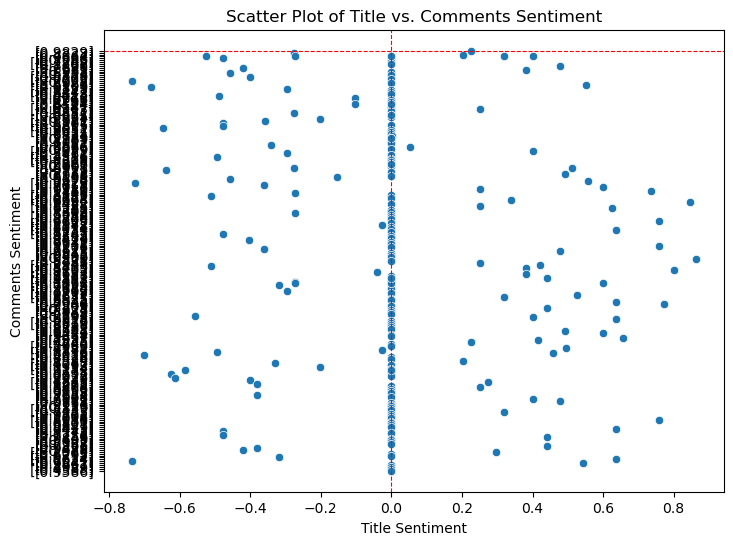

In [116]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='title_sentiment', y='comments_sentiment')
plt.title('Scatter Plot of Title vs. Comments Sentiment')
plt.xlabel('Title Sentiment')
plt.ylabel('Comments Sentiment')
plt.axhline(0, color='red', linestyle='--', linewidth=0.8)  # Add horizontal line at 0
plt.axvline(0, color='red', linestyle='--', linewidth=0.8)  # Add vertical line at 0
plt.show()
